# Vortex induced vibrations **  
 Consider an elementary case where a rigid cylinder is subjected to a uniform cross flow. It is allowed to vibrate in the cross-flow direction only as shown in the figure below 
 

 ##### (Image tirée de [Païdoussis et al., 2010].). 

In [1]:
# =============================================================================
# Define libraries
# =============================================================================
import numpy as np 
import matplotlib.pyplot as plt
from sympy import solve
from sympy import Symbol
from sympy import MutableDenseMatrix

In [2]:
# =============================================================================
# Define system parameters
# =============================================================================

alpha = 1.
ST    = 0.2
M     = 0.1
w = Symbol('w')                   # natural frequency

Omega = np.linspace(0.,4.,100)
rrt = np.zeros((len(Omega),4))    # 2D array for the real part of the frequencies for each Omega
rrI = np.zeros((len(Omega),4))    # 2D array for the Imaginary part of the frequencies for each Omega

In [3]:
# =============================================================================`
# Finding the eigenvalues (natural frequencies) of the system
# =============================================================================
for z in range(len(Omega)):      # A loop to evaluate the determinents and solve for the natural frequencies
    Matrix = MutableDenseMatrix([[1-w**2,-Omega[z]**2*M],[alpha*w**2,Omega[z]**2-w**2]])
    Det = Matrix.det()           # Determinent of the system for each Omega
    roots = solve(Det,w)         # Natural frequencies of the system for each Omega
    
    for i in range(len(roots)):  # A loop to list the real and imaginary parts of the evaluated frequencies
        values = complex(np.array(roots)[i])
        rrt[z,i] = values.real
        rrI[z,i] = values.imag

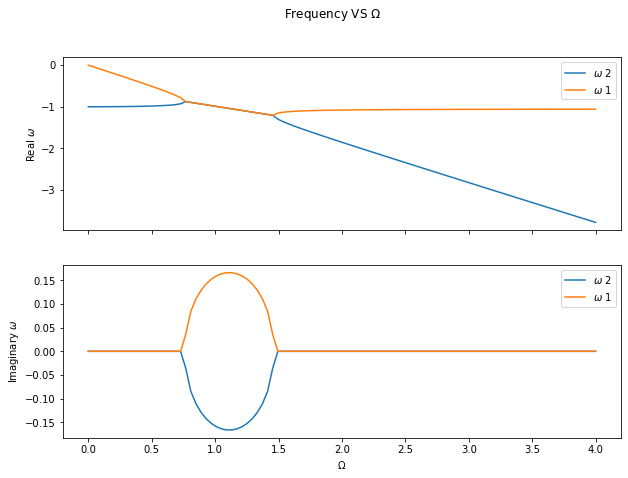

In [4]:
# =============================================================================
# Plotting
# ============================================================================= 
plt.rcParams['figure.figsize'] = [10, 7]
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle(r'Frequency VS $\Omega$')
ax1.plot(Omega,rrt[:,0],Omega,rrt[:,1])
ax2.plot(Omega,rrI[:,0],Omega,rrI[:,1])
plt.xlabel(r'$\Omega$')
ax1.set_ylabel('Real'' ''$\omega$')
ax2.set_ylabel('Imaginary'' ''$\omega$')
ax1.legend([r"$\omega$ 2",'$\omega$ 1'])
ax2.legend([r"$\omega$ 2",'$\omega$ 1'])
plt.show()